In [ ]:
!pip install pdfplumber

In [32]:
import pdfplumber
pdf_file = 'Underwriting/Yash Paystub Nov 17 2023.pdf'
with pdfplumber.open(pdf_file) as pdf:
    # iterate over each page
    for page in pdf.pages:
        # extract text
        text = page.extract_text()
        # print(text)

In [94]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "lines",
        # "snap_y_tolerance": 5,
    # "intersection_x_tolerance": 15,
}

In [95]:
from pprint import pprint

tables = []
with pdfplumber.open(pdf_file) as pdf:
    # iterate over each page
    for page in pdf.pages:
        tables = page.extract_tables(table_settings)
        print(len(tables))

1


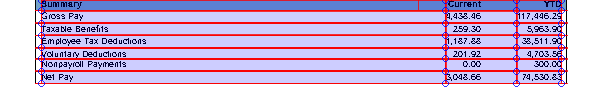

In [96]:
cropped = pdf.pages[0].crop(bbox=(0,230,612,320))
cropped.to_image().debug_tablefinder(table_settings)

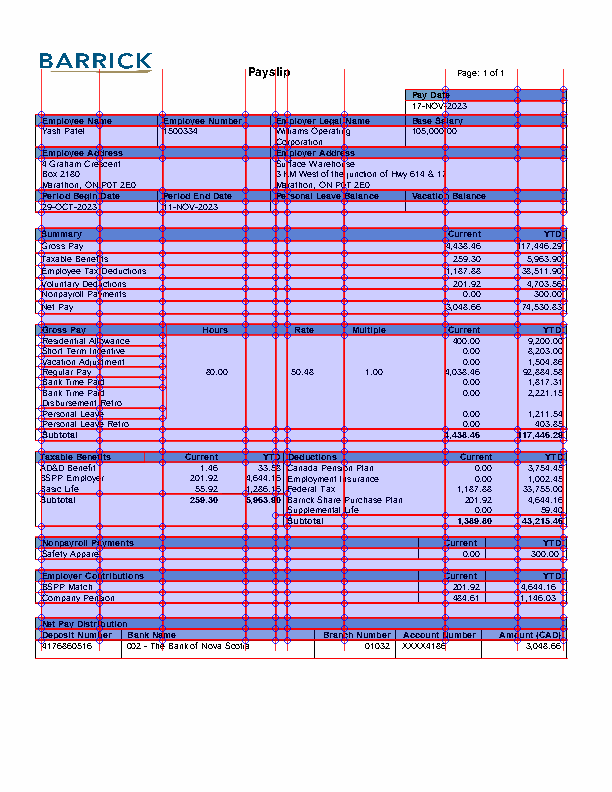

In [73]:
p0 = pdf.pages[0]

im = p0.to_image()
im.debug_tablefinder(table_settings)

In [40]:
import pandas as pd

data_frames = []  # List to store each table as a DataFrame

for table in tables:
    # Filter out rows that are entirely None to handle headers and footers
    filtered_table = [row for row in table if any(cell is not None for cell in row)]
    
    # Convert to DataFrame
    df = pd.DataFrame(filtered_table[1:], columns=filtered_table[0])
    
    # Append to the list of DataFrames
    data_frames.append(df)
    
data_frames[0]

,,,,Pays,lip,,,Page: 1 of 1,
0,,,,,,,,,
1,,,,,,,Pay Dat,e,
2,,,,,,,17-NOV,-2023,
3,,,,,,,,,
4,Employee Na,me,Employee Number,,Em,ployer Legal,Name Base Sa,lary,
5,Yash Patel,,1500334,,Wi,lliams Operatin,"g 105,000",.00,
6,,,,,Co,rporation,,,
7,Employee Ad,dress,,,Em,ployer Addre,ss,,
8,4 Graham Cre,scent,,,Su,rface Warehou,se,,
9,Box 2180,,,,3 K,M West of the,junction of Hwy 614 & 17,,


In [101]:
import pandas as pd

data_frames = []  # List to store each table as a DataFrame
table = cropped
# for table in cropped:
    # Filter out rows that are entirely None to handle headers and footers
# Convert to DataFrame
df = pd.DataFrame(cropped[1:], columns=cropped[0])

# Append to the list of DataFrames
data_frames.append(df)
    
data_frames[0]

TypeError: 'CroppedPage' object is not subscriptable